In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.simple_keypoint_dataset import SimpleKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'keypoint_detection_results'
keypoint_3d_path = dataset_root_path / 'annotations'
bbox_path = dataset_root_path / 'person_detection_results'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_bbox/'


train_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_train.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)
val_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_val.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)
test_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_test.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 75000 val_dataset 37500 test_dataset 30349


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2583.7674140930176


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 5855 batches: 208.9358647800123
val MPJPE from: 37440 samples : 71.85152173042297


Validation: 0it [00:00, ?it/s]

check #2
training loss from 5855 batches: 95.34196398204254
val MPJPE from: 37440 samples : 67.87746399641037


Validation: 0it [00:00, ?it/s]

check #3
training loss from 5855 batches: 91.9458015417055
val MPJPE from: 37440 samples : 66.27577543258667


Validation: 0it [00:00, ?it/s]

check #4
training loss from 5855 batches: 88.909064948457
val MPJPE from: 37440 samples : 64.34516608715057


Validation: 0it [00:00, ?it/s]

check #5
training loss from 5855 batches: 86.78857255297578
val MPJPE from: 37440 samples : 63.54436278343201


Validation: 0it [00:00, ?it/s]

check #6
training loss from 5855 batches: 85.2895724287306
val MPJPE from: 37440 samples : 63.3353516459465


Validation: 0it [00:00, ?it/s]

check #7
training loss from 5855 batches: 84.13299918811002
val MPJPE from: 37440 samples : 62.54628300666809


Validation: 0it [00:00, ?it/s]

check #8
training loss from 5855 batches: 83.16469192886638
val MPJPE from: 37440 samples : 62.287747859954834


Validation: 0it [00:00, ?it/s]

check #9
training loss from 5855 batches: 82.3773819116524
val MPJPE from: 37440 samples : 62.013376504182816


Validation: 0it [00:00, ?it/s]

check #10
training loss from 5855 batches: 81.73538387890659
val MPJPE from: 37440 samples : 61.73459440469742


Validation: 0it [00:00, ?it/s]

check #11
training loss from 5855 batches: 81.27056665648567
val MPJPE from: 37440 samples : 62.03528493642807


Validation: 0it [00:00, ?it/s]

check #12
training loss from 5855 batches: 80.87491844577936
val MPJPE from: 37440 samples : 61.48872151970863


Validation: 0it [00:00, ?it/s]

check #13
training loss from 5855 batches: 80.5118018622891
val MPJPE from: 37440 samples : 61.647795140743256


Validation: 0it [00:00, ?it/s]

check #14
training loss from 5855 batches: 80.28829175498524
val MPJPE from: 37440 samples : 61.32000684738159


Validation: 0it [00:00, ?it/s]

check #15
training loss from 5855 batches: 79.99334695067394
val MPJPE from: 37440 samples : 61.511341482400894


Validation: 0it [00:00, ?it/s]

check #16
training loss from 5855 batches: 79.80806145731147
val MPJPE from: 37440 samples : 61.640918254852295


Validation: 0it [00:00, ?it/s]

check #17
training loss from 5855 batches: 79.68939671039989
val MPJPE from: 37440 samples : 61.409611254930496


Validation: 0it [00:00, ?it/s]

check #18
training loss from 5855 batches: 79.596184956325
val MPJPE from: 37440 samples : 61.387091875076294


Validation: 0it [00:00, ?it/s]

check #19
training loss from 5855 batches: 79.46085988151835
val MPJPE from: 37440 samples : 61.09873577952385


Validation: 0it [00:00, ?it/s]

check #20
training loss from 5855 batches: 79.43819612900892
val MPJPE from: 37440 samples : 61.54926121234894


Validation: 0it [00:00, ?it/s]

check #21
training loss from 5855 batches: 79.34250992831768
val MPJPE from: 37440 samples : 61.04135885834694


Validation: 0it [00:00, ?it/s]

check #22
training loss from 5855 batches: 79.28005983491518
val MPJPE from: 37440 samples : 61.80456280708313


Validation: 0it [00:00, ?it/s]

check #23
training loss from 5855 batches: 79.2408952338384
val MPJPE from: 37440 samples : 61.68742850422859


Validation: 0it [00:00, ?it/s]

check #24
training loss from 5855 batches: 79.12938910911065
val MPJPE from: 37440 samples : 61.06482446193695


Validation: 0it [00:00, ?it/s]

check #25
training loss from 5855 batches: 79.12916683239575
val MPJPE from: 37440 samples : 61.37368083000183


Validation: 0it [00:00, ?it/s]

check #26
training loss from 5855 batches: 79.10405246749279
val MPJPE from: 37440 samples : 61.58285588026047


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_14/checkpoints/epoch=104-step=122955.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_14/checkpoints/epoch=104-step=122955.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 62.61853698212244
PJPE
                      PJPE
nose             48.450868
left_eye         45.738231
right_eye        46.761666
left_ear         42.024449
right_ear        42.687061
left_shoulder    37.807211
right_shoulder   37.803385
left_elbow       89.797994
right_elbow      64.648849
left_wrist      127.389875
right_wrist      97.577127
left_hip         68.687173
right_hip        64.541005
activities_mpjpe:
{}
test mpjpe: 62.61853698212244


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     62.61853698212244     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 62.61853698212244}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,48.450868
left_eye,45.738231
right_eye,46.761666
left_ear,42.024449
right_ear,42.687061
left_shoulder,37.807211
right_shoulder,37.803385
left_elbow,89.797994
right_elbow,64.648849
left_wrist,127.389875


In [4]:
trainer.model.test_history[0]['mpjpe']

62.61853698212244

[783.6123, 418.5151, 1263.5841, 1002.7969]
[660.0046, 273.2206, 1015.0612, 838.0824]
[926.408, 150.8308, 1647.6089, 969.7477]


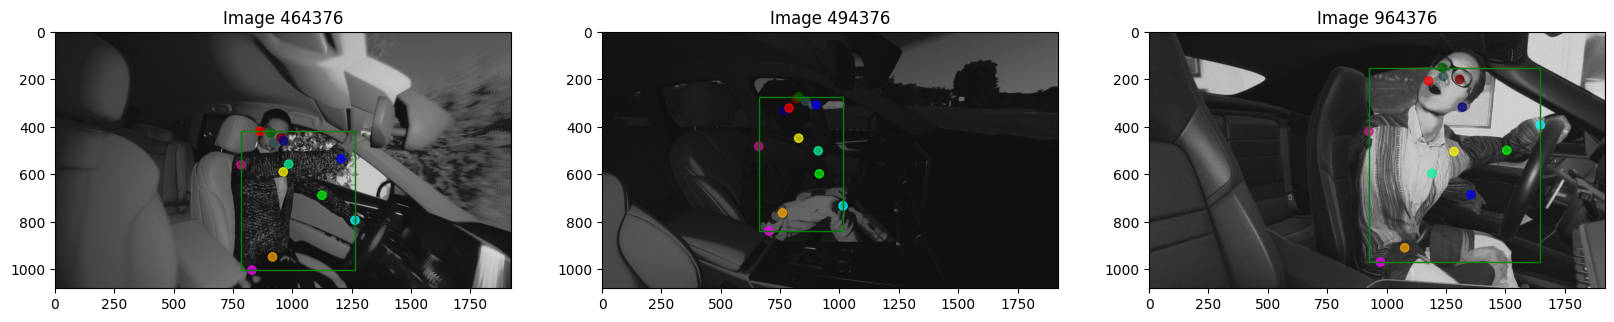

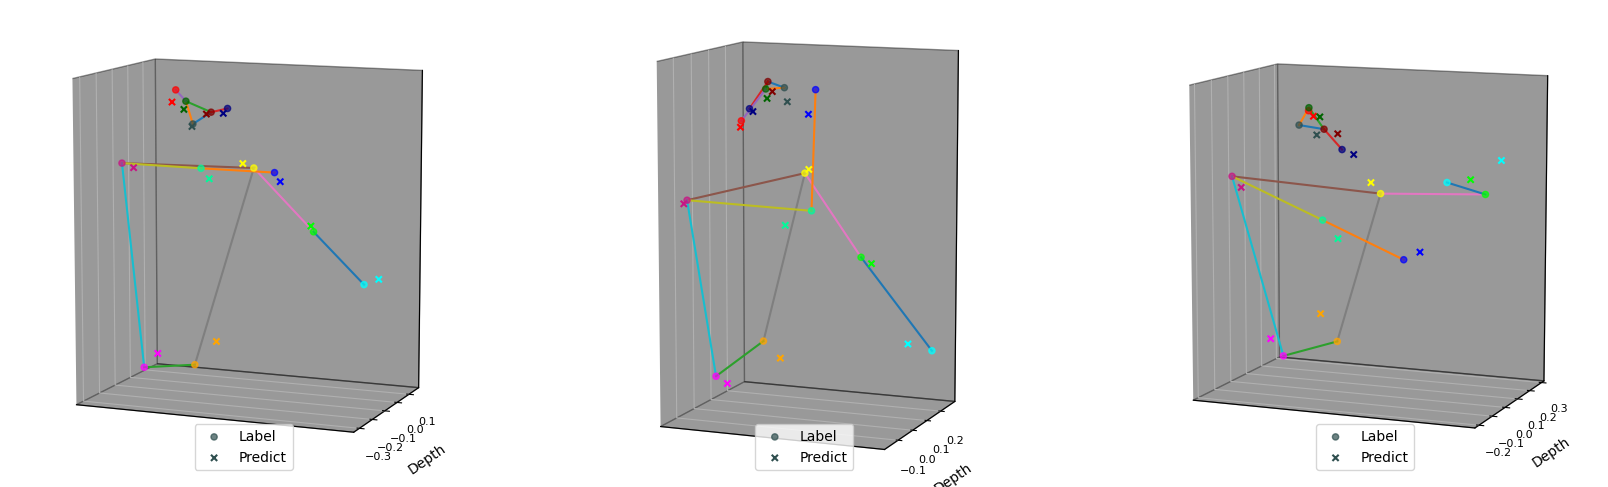

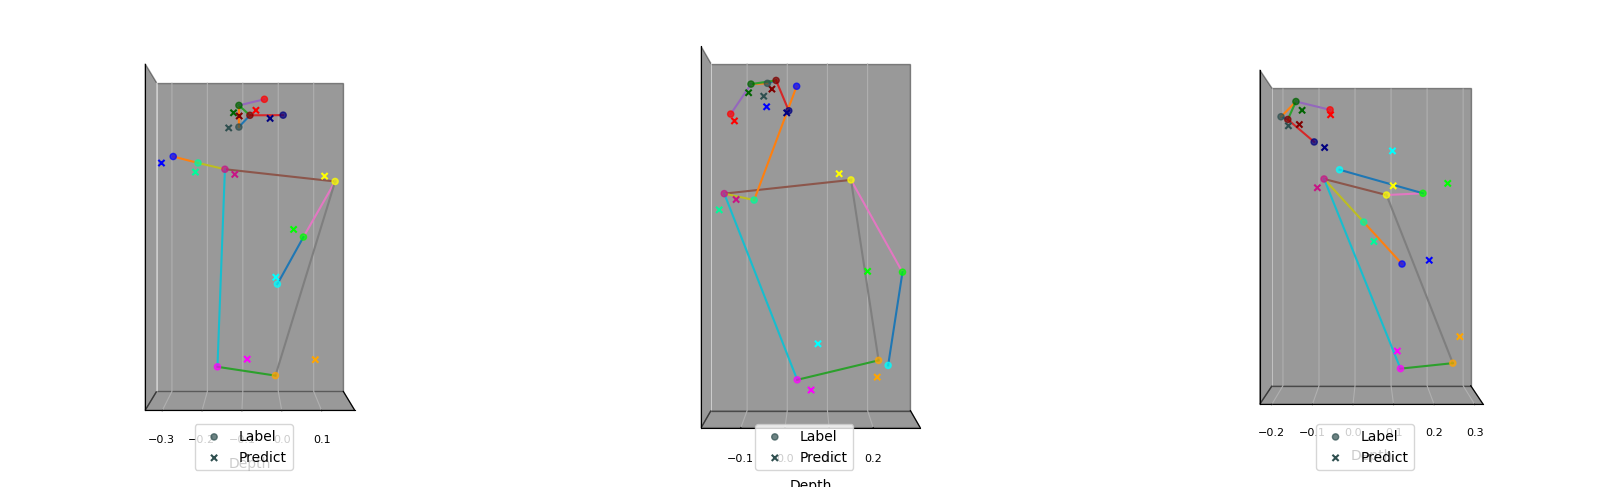

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)